# K - Nearest Neighbours Classification

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [6]:
tail(dataset)

,Age,EstimatedSalary,Purchased
395,39,59000,0
396,46,41000,1
397,51,23000,1
398,50,20000,1
399,36,33000,0
400,49,36000,1


In [4]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [7]:
tail(dataset)

,Age,EstimatedSalary,Purchased
395,39,59000,0
396,46,41000,1
397,51,23000,1
398,50,20000,1
399,36,33000,0
400,49,36000,1


In [8]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [9]:
tail(training_set)

,Age,EstimatedSalary,Purchased
393,45,45000,1
394,60,42000,1
396,46,41000,1
397,51,23000,1
398,50,20000,1
399,36,33000,0


In [10]:
tail(test_set)

,Age,EstimatedSalary,Purchased
380,58,23000,1
383,44,139000,1
389,47,34000,1
392,47,23000,1
395,39,59000,0
400,49,36000,1


In [11]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [12]:
tail(training_set)

,Age,EstimatedSalary,Purchased
393,0.7202414,-0.7312956,1
394,2.1543504,-0.8169163,1
396,0.8158487,-0.8454565,1
397,1.2938850,-1.3591805,1
398,1.1982777,-1.4448012,1
399,-0.1402240,-1.0737783,0


In [13]:
tail(test_set)

,Age,EstimatedSalary,Purchased
380,1.86859958,-1.4171394,1
383,0.54603163,2.3104834,1
389,0.82943904,-1.0636579,1
392,0.82943904,-1.4171394,1
395,0.07368593,-0.2602909,0
400,1.01837732,-0.9993885,1


In [20]:
# Fitting K-NN to the Training set and Predicting the Test set results
library(class)
y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)

In [21]:
y_pred

[1] 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0
 [75] 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1
attr(,"prob")
  [1] 1.0 1.0 1.0 1.0 1.0 0.8 0.8 1.0 0.6 1.0 1.0 1.0 0.8 1.0 1.0 1.0 1.0 1.0
 [19] 1.0 1.0 0.6 1.0 1.0 0.8 1.0 0.8 1.0 1.0 0.8 1.0 1.0 0.8 0.8 1.0 1.0 1.0
 [37] 1.0 1.0 1.0 1.0 0.8 1.0 1.0 1.0 0.8 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [55] 1.0 1.0 1.0 1.0 0.8 0.8 0.8 1.0 0.6 1.0 0.6 1.0 0.8 0.8 1.0 0.8 0.8 0.8
 [73] 0.8 0.8 0.6 1.0 0.8 1.0 1.0 1.0 1.0 0.8 1.0 1.0 0.8 0.8 0.8 0.6 0.8 1.0
 [91] 0.8 0.8 0.8 0.8 1.0 0.6 1.0 0.8 1.0 1.0
Levels: 0 1

In [25]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 59  5
  1  6 30

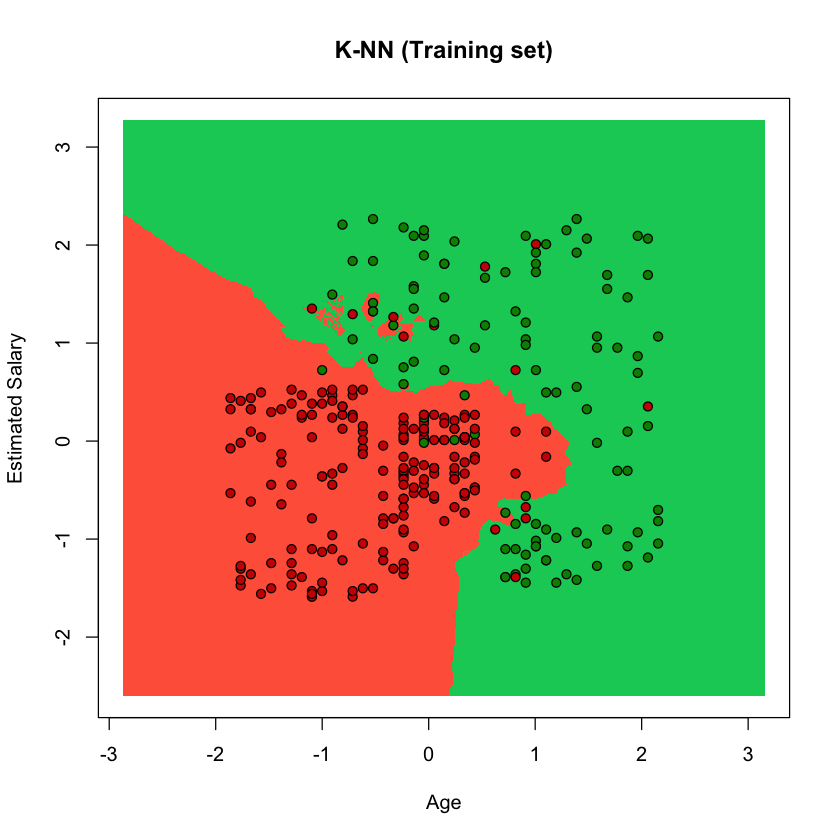

In [26]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

**The KNN did a better classification in identifying the users than the Logistic Model of Classification.**

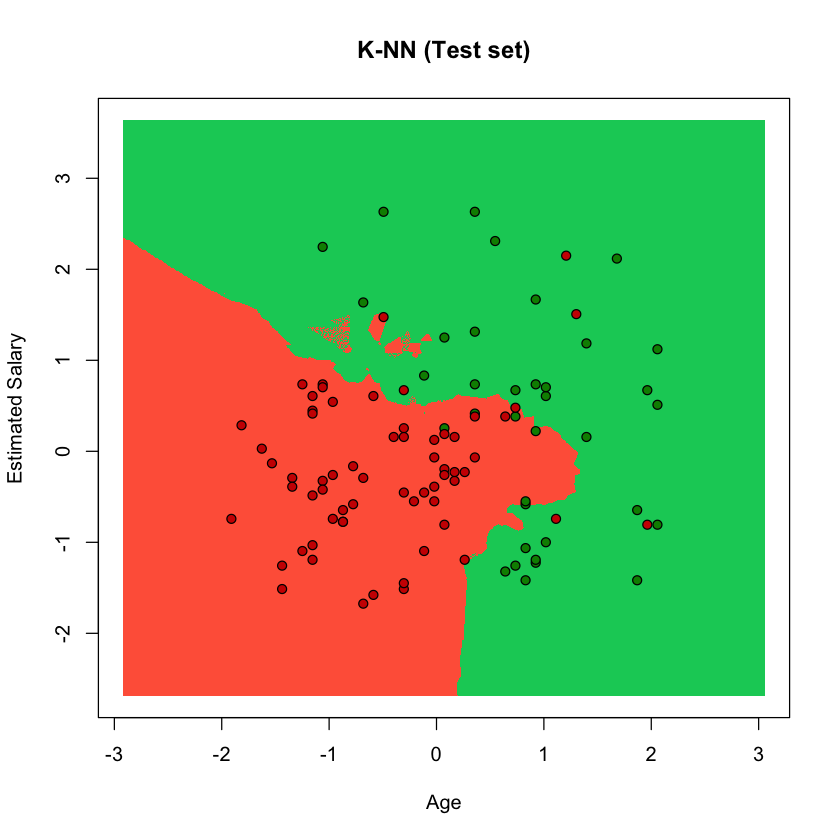

In [27]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))